In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
combine = [train_df, test_df]

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
for dataset in combine:
    age_median = dataset['Age'].dropna(inplace=False).median()
    dataset['Age'] = dataset['Age'].fillna(age_median)

In [11]:
for dataset in combine:
    fare_median = dataset['Fare'].dropna(inplace=False).median()
    dataset['Fare'] = dataset['Fare'].fillna(fare_median)
print(fare_median)

14.4542


In [12]:
for dataset in combine:
    embarked_mode = dataset['Embarked'].dropna(inplace=False).mode()[0]
    dataset['Embarked'] = dataset['Embarked'].fillna(embarked_mode)
print(embarked_mode)    

S


In [13]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

for dataset in combine:
    dataset['Embarked_Code'] = le.fit_transform(dataset['Embarked'])
    dataset['Sex_Code'] = le.fit_transform(dataset['Sex'])

In [16]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Code,Sex_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,1


In [17]:
for dataset in combine:
    embarked_mode = dataset['Embarked'].dropna(inplace=False).mode()
    dataset['Embarked'] = dataset['Embarked'].fillna(embarked_mode)

In [18]:
train_df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
Embarked_Code      0
Sex_Code           0
dtype: int64

In [19]:
test_df.isnull().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            327
Embarked           0
Embarked_Code      0
Sex_Code           0
dtype: int64

In [20]:
train_df_copy = train_df.copy('deep')
test_df_copy = test_df.copy('deep')
combine_copy = [train_df_copy, test_df_copy]

In [21]:
for dataset in combine:
    dataset.drop(['Sex','Cabin','Embarked'],axis=1,inplace=True)

In [22]:
print(train_df.columns)
print(test_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked_Code', 'Sex_Code'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked_Code', 'Sex_Code'],
      dtype='object')


In [23]:
train_df['Ticket'].value_counts()

CA. 2343      7
347082        7
1601          7
CA 2144       6
3101295       6
             ..
2677          1
315093        1
347743        1
C.A. 29395    1
228414        1
Name: Ticket, Length: 681, dtype: int64

In [24]:
for dataset in combine:
    dataset.drop(['Ticket'],axis=1,inplace=True)

In [25]:
print(train_df.columns)
print(test_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked_Code', 'Sex_Code'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Code', 'Sex_Code'],
      dtype='object')


In [26]:
train_df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [27]:
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [28]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked_Code,Sex_Code,Title
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,2,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,2,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,2,1,Mr


In [29]:
test_df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Fare,Embarked_Code,Sex_Code,Title
0,892,3,"Kelly, Mr. James",34.5,0,0,7.8292,1,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,2,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,1,1,Mr
3,895,3,"Wirz, Mr. Albert",27.0,0,0,8.6625,2,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,2,0,Mrs


In [30]:
for dataset in combine:
    dataset.drop(['Name'], axis=1, inplace=True)

In [31]:
print(train_df.columns)
print(test_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Code', 'Sex_Code', 'Title'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Code', 'Sex_Code', 'Title'],
      dtype='object')


In [32]:
for dataset in combine:
    dataset['Title_Code'] = le.fit_transform(dataset['Title'])

In [33]:
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Code,Sex_Code,Title,Title_Code
0,1,0,3,22.0,1,0,7.2500,2,1,Mr,12
1,2,1,1,38.0,1,0,71.2833,0,0,Mrs,13
2,3,1,3,26.0,0,0,7.9250,2,0,Miss,9
3,4,1,1,35.0,1,0,53.1000,2,0,Mrs,13
4,5,0,3,35.0,0,0,8.0500,2,1,Mr,12


In [34]:
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_Code,Sex_Code,Title,Title_Code
0,892,3,34.5,0,0,7.8292,1,1,Mr,5
1,893,3,47.0,1,0,7.0000,2,0,Mrs,6
2,894,2,62.0,0,0,9.6875,1,1,Mr,5
3,895,3,27.0,0,0,8.6625,2,1,Mr,5
4,896,3,22.0,1,1,12.2875,2,0,Mrs,6


In [35]:
train_df_copy['Title_Code'] = train_df['Title_Code']
test_df_copy['Title_Code'] = test_df['Title_Code']

In [36]:
print(train_df_copy.columns)
print(test_df_copy.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_Code',
       'Sex_Code', 'Title_Code'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_Code', 'Sex_Code',
       'Title_Code'],
      dtype='object')


In [37]:
print(train_df.columns)
print(test_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Code', 'Sex_Code', 'Title', 'Title_Code'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Code', 'Sex_Code', 'Title', 'Title_Code'],
      dtype='object')


In [38]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Code,Sex_Code,Title_Code
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,0.013128,0.042939,0.021692
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.167675,-0.543351,-0.201345
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.162098,0.131900,0.045541
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.018754,0.081163,0.272384
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.068230,-0.114631,-0.191786
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.039798,-0.245489,-0.119721
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.224719,-0.182333,-0.086359
Embarked_Code,0.013128,-0.167675,0.162098,-0.018754,0.068230,0.039798,-0.224719,1.000000,0.108262,0.066462
Sex_Code,0.042939,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,0.108262,1.000000,0.256407
Title_Code,0.021692,-0.201345,0.045541,0.272384,-0.191786,-0.119721,-0.086359,0.066462,0.256407,1.000000


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

colormap = plt.cm.viridis
#plt.figure(figsize=(10,10))
#plt.title('Pearson co-efficient of features')
#sns.heatmap(train_df.astype(float).corr(), cmap=colormap, linecolor='white', annot=True, square=True, vmax=1.0)

In [40]:
for dataset in combine:
    dataset.drop(['PassengerId'], axis=1, inplace=True)

In [41]:
print(train_df.columns)
print(test_df.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Code',
       'Sex_Code', 'Title', 'Title_Code'],
      dtype='object')
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Code', 'Sex_Code',
       'Title', 'Title_Code'],
      dtype='object')


In [42]:
for dataset in combine:
    dataset['Family Size'] = dataset['Parch'] + dataset['SibSp'] + 1

In [43]:
print(train_df.columns)
print(test_df.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Code',
       'Sex_Code', 'Title', 'Title_Code', 'Family Size'],
      dtype='object')
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Code', 'Sex_Code',
       'Title', 'Title_Code', 'Family Size'],
      dtype='object')


In [44]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Code,Sex_Code,Title,Title_Code,Family Size
0,0,3,22.0,1,0,7.2500,2,1,Mr,12,2
1,1,1,38.0,1,0,71.2833,0,0,Mrs,13,2
2,1,3,26.0,0,0,7.9250,2,0,Miss,9,1
3,1,1,35.0,1,0,53.1000,2,0,Mrs,13,2
4,0,3,35.0,0,0,8.0500,2,1,Mr,12,1


In [45]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_Code,Sex_Code,Title,Title_Code,Family Size
0,3,34.5,0,0,7.8292,1,1,Mr,5,1
1,3,47.0,1,0,7.0000,2,0,Mrs,6,2
2,2,62.0,0,0,9.6875,1,1,Mr,5,1
3,3,27.0,0,0,8.6625,2,1,Mr,5,1
4,3,22.0,1,1,12.2875,2,0,Mrs,6,3


In [46]:
train_df_copy['Family Size'] = train_df['Family Size']
test_df_copy['Family Size'] = test_df['Family Size']

In [47]:
train_df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Code,Sex_Code,Title_Code,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,12,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,13,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0,9,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,13,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,1,12,1


In [48]:
test_df_copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Code,Sex_Code,Title_Code,Family Size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,5,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,0,6,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,5,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2,1,5,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,0,6,3


In [49]:
train_df[['Family Size', 'Survived']].groupby(['Family Size']).mean().sort_values(['Survived'], ascending=False)

,Survived
Family Size,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [50]:
train_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Code,Sex_Code,Title_Code,Family Size
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.167675,-0.543351,-0.201345,0.016639
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.162098,0.131900,0.045541,0.065997
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.018754,0.081163,0.272384,-0.245619
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.068230,-0.114631,-0.191786,0.890712
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.039798,-0.245489,-0.119721,0.783111
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.224719,-0.182333,-0.086359,0.217138
Embarked_Code,-0.167675,0.162098,-0.018754,0.068230,0.039798,-0.224719,1.000000,0.108262,0.066462,0.066516
Sex_Code,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,0.108262,1.000000,0.256407,-0.200988
Title_Code,-0.201345,0.045541,0.272384,-0.191786,-0.119721,-0.086359,0.066462,0.256407,1.000000,-0.190890
Family Size,0.016639,0.065997,-0.245619,0.890712,0.783111,0.217138,0.066516,-0.200988,-0.190890,1.000000


In [51]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['Family Size'] == 1, 'IsAlone'] = 1

In [52]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Code,Sex_Code,Title,Title_Code,Family Size,IsAlone
0,0,3,22.0,1,0,7.2500,2,1,Mr,12,2,0
1,1,1,38.0,1,0,71.2833,0,0,Mrs,13,2,0
2,1,3,26.0,0,0,7.9250,2,0,Miss,9,1,1
3,1,1,35.0,1,0,53.1000,2,0,Mrs,13,2,0
4,0,3,35.0,0,0,8.0500,2,1,Mr,12,1,1


In [53]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_Code,Sex_Code,Title,Title_Code,Family Size,IsAlone
0,3,34.5,0,0,7.8292,1,1,Mr,5,1,1
1,3,47.0,1,0,7.0000,2,0,Mrs,6,2,0
2,2,62.0,0,0,9.6875,1,1,Mr,5,1,1
3,3,27.0,0,0,8.6625,2,1,Mr,5,1,1
4,3,22.0,1,1,12.2875,2,0,Mrs,6,3,0


In [54]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone']).mean().sort_values(['Survived'], ascending=False)

,Survived
IsAlone,
0,0.505650
1,0.303538


In [55]:
for dataset in combine:
    dataset['AgeBin'] = dataset['Age'].apply(lambda x: 1 if np.logical_and(x > 16, x <=32) else 2 if np.logical_and(x > 32, x<= 48) else 3 if np.logical_and(x > 48, x <= 64) else 4 if (x > 64) else 0)

In [56]:
train_df.head(15)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Code,Sex_Code,Title,Title_Code,Family Size,IsAlone,AgeBin
0,0,3,22.0,1,0,7.2500,2,1,Mr,12,2,0,1
1,1,1,38.0,1,0,71.2833,0,0,Mrs,13,2,0,2
2,1,3,26.0,0,0,7.9250,2,0,Miss,9,1,1,1
3,1,1,35.0,1,0,53.1000,2,0,Mrs,13,2,0,2
4,0,3,35.0,0,0,8.0500,2,1,Mr,12,1,1,2
5,0,3,28.0,0,0,8.4583,1,1,Mr,12,1,1,1
6,0,1,54.0,0,0,51.8625,2,1,Mr,12,1,1,3
7,0,3,2.0,3,1,21.0750,2,1,Master,8,5,0,0
8,1,3,27.0,0,2,11.1333,2,0,Mrs,13,3,0,1
9,1,2,14.0,1,0,30.0708,0,0,Mrs,13,2,0,0


In [57]:
for dataset in combine:
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

In [58]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Code,Sex_Code,Title,Title_Code,Family Size,IsAlone,AgeBin,FareBin
0,0,3,22.0,1,0,7.2500,2,1,Mr,12,2,0,1,"(-0.001, 7.91]"
1,1,1,38.0,1,0,71.2833,0,0,Mrs,13,2,0,2,"(31.0, 512.329]"
2,1,3,26.0,0,0,7.9250,2,0,Miss,9,1,1,1,"(7.91, 14.454]"
3,1,1,35.0,1,0,53.1000,2,0,Mrs,13,2,0,2,"(31.0, 512.329]"
4,0,3,35.0,0,0,8.0500,2,1,Mr,12,1,1,2,"(7.91, 14.454]"


In [59]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_Code,Sex_Code,Title,Title_Code,Family Size,IsAlone,AgeBin,FareBin
0,3,34.5,0,0,7.8292,1,1,Mr,5,1,1,2,"(-0.001, 7.896]"
1,3,47.0,1,0,7.0000,2,0,Mrs,6,2,0,2,"(-0.001, 7.896]"
2,2,62.0,0,0,9.6875,1,1,Mr,5,1,1,3,"(7.896, 14.454]"
3,3,27.0,0,0,8.6625,2,1,Mr,5,1,1,1,"(7.896, 14.454]"
4,3,22.0,1,1,12.2875,2,0,Mrs,6,3,0,1,"(7.896, 14.454]"


In [60]:
for dataset in combine:
    dataset['FareBin_Code'] = le.fit_transform(dataset['FareBin']) 

In [61]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Code,Sex_Code,Title,Title_Code,Family Size,IsAlone,AgeBin,FareBin,FareBin_Code
0,0,3,22.0,1,0,7.2500,2,1,Mr,12,2,0,1,"(-0.001, 7.91]",0
1,1,1,38.0,1,0,71.2833,0,0,Mrs,13,2,0,2,"(31.0, 512.329]",3
2,1,3,26.0,0,0,7.9250,2,0,Miss,9,1,1,1,"(7.91, 14.454]",1
3,1,1,35.0,1,0,53.1000,2,0,Mrs,13,2,0,2,"(31.0, 512.329]",3
4,0,3,35.0,0,0,8.0500,2,1,Mr,12,1,1,2,"(7.91, 14.454]",1


In [62]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_Code,Sex_Code,Title,Title_Code,Family Size,IsAlone,AgeBin,FareBin,FareBin_Code
0,3,34.5,0,0,7.8292,1,1,Mr,5,1,1,2,"(-0.001, 7.896]",0
1,3,47.0,1,0,7.0000,2,0,Mrs,6,2,0,2,"(-0.001, 7.896]",0
2,2,62.0,0,0,9.6875,1,1,Mr,5,1,1,3,"(7.896, 14.454]",1
3,3,27.0,0,0,8.6625,2,1,Mr,5,1,1,1,"(7.896, 14.454]",1
4,3,22.0,1,1,12.2875,2,0,Mrs,6,3,0,1,"(7.896, 14.454]",1


In [63]:
train_df_copy['AgeBin'] = train_df['AgeBin']
train_df_copy['FareBin_Code'] = train_df['FareBin_Code']
test_df_copy['AgeBin'] = test_df['AgeBin']
test_df_copy['FareBin_Code'] = test_df['FareBin_Code']

In [64]:
train_df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Code,Sex_Code,Title_Code,Family Size,AgeBin,FareBin_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,12,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,13,2,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0,9,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,13,2,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,1,12,1,2,1


In [65]:
test_df_copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Code,Sex_Code,Title_Code,Family Size,AgeBin,FareBin_Code
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,5,1,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,0,6,2,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,5,1,3,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2,1,5,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,0,6,3,1,1


In [66]:
train_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Code,Sex_Code,Title_Code,Family Size,IsAlone,AgeBin,FareBin_Code
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.167675,-0.543351,-0.201345,0.016639,-0.203367,-0.043800,0.299357
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.162098,0.131900,0.045541,0.065997,0.135207,-0.358769,-0.634271
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.018754,0.081163,0.272384,-0.245619,0.171647,0.939139,0.084434
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.068230,-0.114631,-0.191786,0.890712,-0.584471,-0.218747,0.393025
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.039798,-0.245489,-0.119721,0.783111,-0.583398,-0.135227,0.393881
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.224719,-0.182333,-0.086359,0.217138,-0.271832,0.123640,0.579345
Embarked_Code,-0.167675,0.162098,-0.018754,0.068230,0.039798,-0.224719,1.000000,0.108262,0.066462,0.066516,0.063532,-0.003402,-0.098593
Sex_Code,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,0.108262,1.000000,0.256407,-0.200988,0.303646,0.070220,-0.243613
Title_Code,-0.201345,0.045541,0.272384,-0.191786,-0.119721,-0.086359,0.066462,0.256407,1.000000,-0.190890,0.060627,0.230381,-0.109890
Family Size,0.016639,0.065997,-0.245619,0.890712,0.783111,0.217138,0.066516,-0.200988,-0.190890,1.000000,-0.690922,-0.217063,0.465396


<AxesSubplot:>

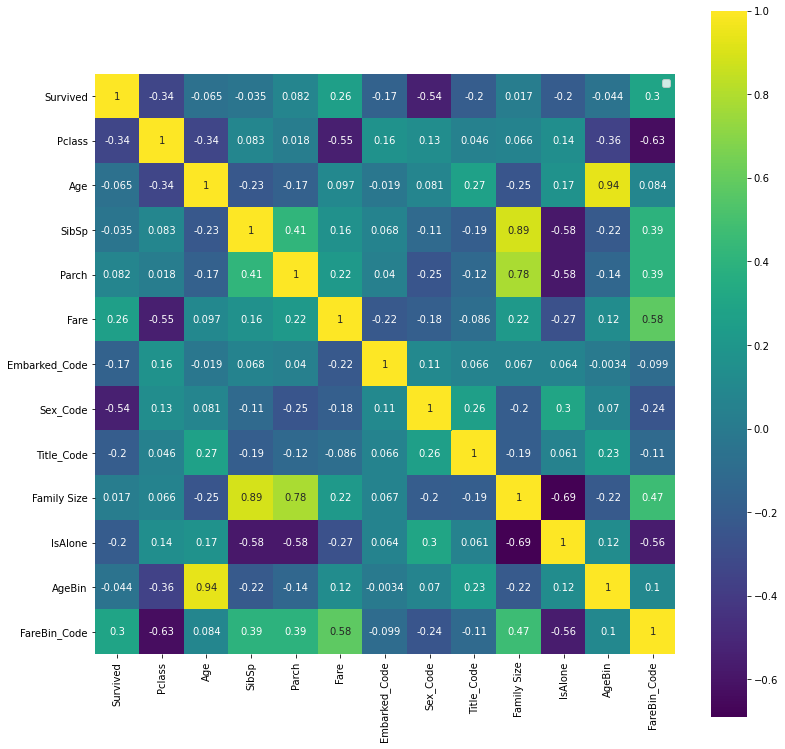

In [67]:
plt.figure(figsize=(13,13))
plt.legend('Pearson Coefficient for Data')
sns.heatmap(train_df.corr(), cmap=colormap,annot=True, square=True,linecolor='white')

In [68]:
train_df.columns, test_df.columns

(Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Code',
        'Sex_Code', 'Title', 'Title_Code', 'Family Size', 'IsAlone', 'AgeBin',
        'FareBin', 'FareBin_Code'],
       dtype='object'),
 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Code', 'Sex_Code',
        'Title', 'Title_Code', 'Family Size', 'IsAlone', 'AgeBin', 'FareBin',
        'FareBin_Code'],
       dtype='object'))

In [69]:
for dataset in combine:
    dataset.drop(['SibSp', 'Parch', 'Title', 'FareBin'], axis=1, inplace=True)

In [70]:
train_df.columns, test_df.columns

(Index(['Survived', 'Pclass', 'Age', 'Fare', 'Embarked_Code', 'Sex_Code',
        'Title_Code', 'Family Size', 'IsAlone', 'AgeBin', 'FareBin_Code'],
       dtype='object'),
 Index(['Pclass', 'Age', 'Fare', 'Embarked_Code', 'Sex_Code', 'Title_Code',
        'Family Size', 'IsAlone', 'AgeBin', 'FareBin_Code'],
       dtype='object'))

In [71]:
for dataset in combine:
    dataset.drop(['Age', 'Fare', 'Family Size'], axis=1, inplace=True)

In [72]:
Y_train = train_df['Survived']
X_train = train_df.drop(['Survived'], axis=1)
X_test = test_df.copy()
Y_train.shape, X_train.shape, X_test.shape

((891,), (891, 7), (418, 7))

In [73]:
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC

In [74]:
def modelScore(model):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print(model.score(X_train, Y_train))

In [75]:
modelScore(LogisticRegression())

0.7912457912457912


In [76]:
modelScore(Perceptron())

0.7631874298540965


In [77]:
modelScore(SGDClassifier())

0.7654320987654321


In [78]:
modelScore(DecisionTreeClassifier())

0.8709315375982043


In [79]:
modelScore(RandomForestClassifier())

0.8709315375982043


In [80]:
modelScore(KNeighborsClassifier())

0.8484848484848485


In [81]:
modelScore(GaussianNB())

0.7643097643097643


In [82]:
modelScore(SVC())

0.7822671156004489


In [83]:
modelScore(LinearSVC())

0.7833894500561167


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
